# K means Clustering: Depression, Amangeldi Nurgalym

# Цель:
Определить, существует ли взаимосвязь между более высокими уровнями черно-белого мышления и более высокими уровнями
депрессии, о которой сообщают сами пациенты психиатрических клиник, госпитализированные по поводу депрессии.Также применение кластеризацию K-Means и назначение группы для прогнозирования модели

# Источники данных:
Данные, использованные для этого исследования, взяты из базы данных Гинзберга, которая основана на психиатрических пациентах, госпитализированных по поводу депрессии. 
Данные взяты из книги "Прикладной регрессионный анализ и обобщенные линейные модели", второе издание Фокса Дж. (2008). Набор данных
включает три переменные - простоту (черно-белое мышление), фатализм и депрессию. Данные также включают эти
переменные, каждая из которых скорректирована с помощью регрессии для других переменных, которые, как считается, влияют на депрессию. Для целей этого исследования 
будут использоваться нескорректированные значения. Набор данных Гинзберга о депрессии display_output(Гинзберг, out_type) простота фатализм
депрессия adjsimp adjfatal adjdep 

Here, "black and white thinking" is referred to as "Simplicity"

In [1]:
%matplotlib inline 

In [2]:
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

import pandas as pd    

import matplotlib.pyplot as plt   

#импорт seaborn для статистических графиков
import seaborn as sns

from sklearn import metrics

import pandas as pd

from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import os
os.listdir('../input')

['depression-dataset']

In [4]:
# чтение CSV-файла в фрейм данных pandas
mydata = pd.read_csv("../input/depression-dataset/Depression.csv")

In [5]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [6]:
mydata.drop('id', axis=1, inplace=True)

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
simplicity    82 non-null float64
fatalism      82 non-null float64
depression    82 non-null float64
adjsimp       82 non-null float64
adjfatal      82 non-null float64
adjdep        82 non-null float64
dtypes: float64(6)
memory usage: 4.0 KB


In [8]:
mydata.describe()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.000000,1.000000,1.000001,1.000000,1.000000,1.000000
std,0.500000,0.500001,0.500000,0.499999,0.500000,0.500000
min,0.250680,-0.058370,0.469530,0.235690,0.030120,0.234540
25%,0.656282,0.563010,0.566410,0.697958,0.731598,0.596565
50%,0.882665,0.977270,0.824750,0.968490,0.924290,0.967845
75%,1.269400,1.391520,1.373730,1.201790,1.299120,1.261750
max,2.854080,2.220030,2.245650,2.949770,2.249310,2.787630


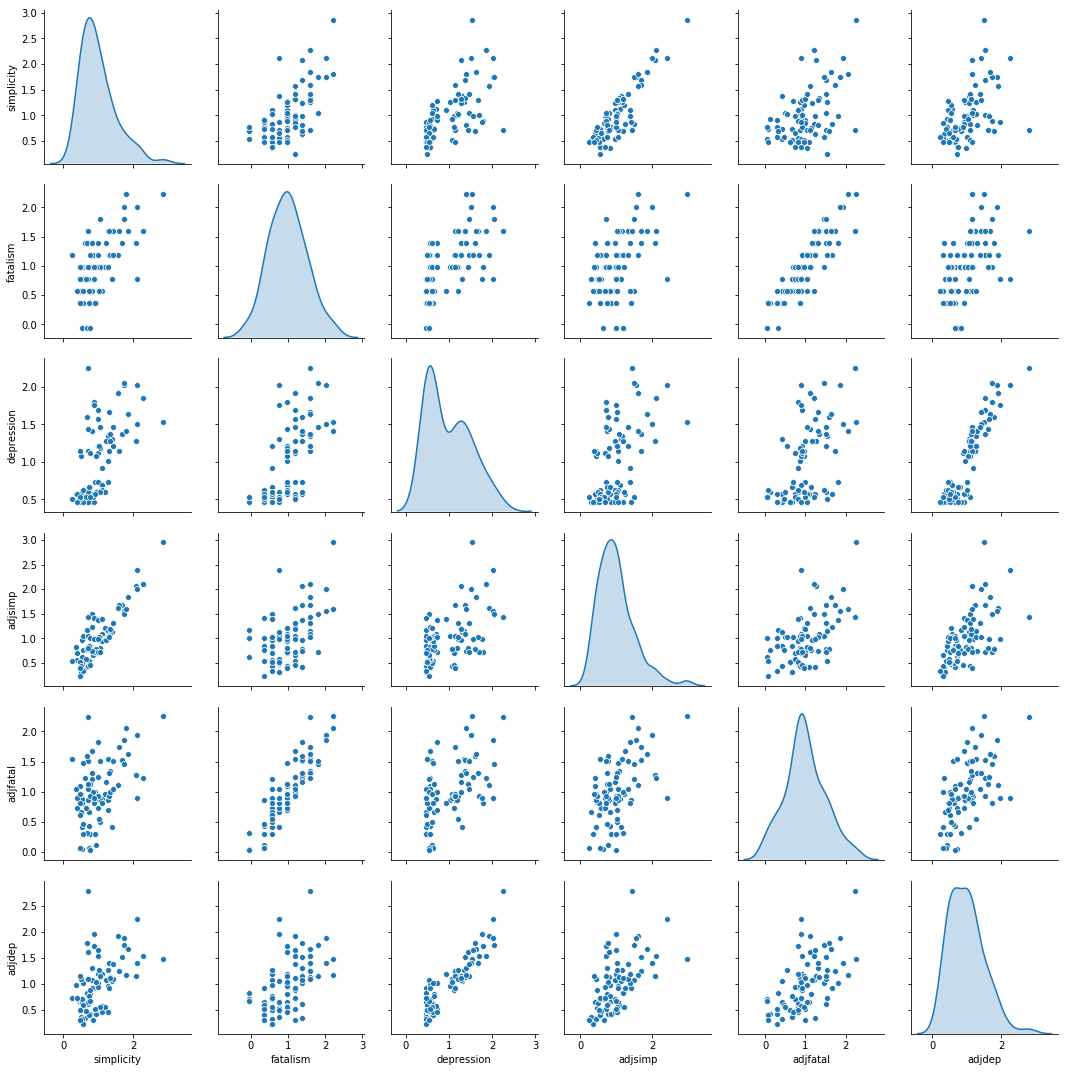

In [9]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde') 

In [10]:
##Основываясь на графиках kde, мы можем работать с 2 или 3 кластерами

## Масштабирование данных для более точной кластеризации.

In [11]:
##Масштабирование данных
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)


### Этот блок кода позволяет определить оптимальное количество кластеров для кластеризации методом локтя, исходя из среднего искажения в данных.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

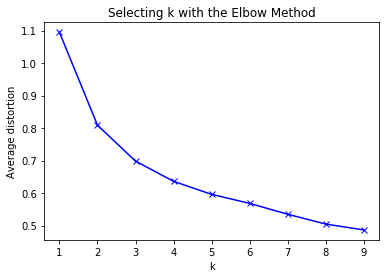

In [12]:
# Этот блок кода позволяет определить оптимальное количество кластеров для кластеризации методом локтя, исходя из среднего искажения в данных.
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## Кластеризация данных с использованием алгоритма K-Means и определение центроидов кластеров.

In [13]:
#Установим значение k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [14]:
kmeans.fit(mydata_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

## Присвоение меток кластерам и анализ полученных кластеров.

In [15]:
centroids = kmeans.cluster_centers_

In [16]:
centroids

array([[-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

In [17]:
##Вычисление центроидов для профилируемых столбцов
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [18]:
print(centroid_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
1   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


#### Кластер 1 имеет наименьшее значение, а кластер 2 имеет наибольшее значение

In [19]:
## создание нового фрейма данных только для меток и преобразование его в категориальную переменную
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
df_labels.labels.head(3)

0    1
1    1
2    1
Name: labels, dtype: category
Categories (3, int64): [0, 1, 2]

In [20]:
# # Соединение фрейма данных метки с фреймом данных.
df_labeled = mydata.join(df_labels)

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0], dtype=int32)

In [22]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177) 
 # groupby создает сгруппированный фрейм данных, который необходимо преобразовать обратно в dataframe. 
df_analysis.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1


In [23]:
df_labeled['labels'].value_counts()  

1    37
0    32
2    13
Name: labels, dtype: int64

In [24]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

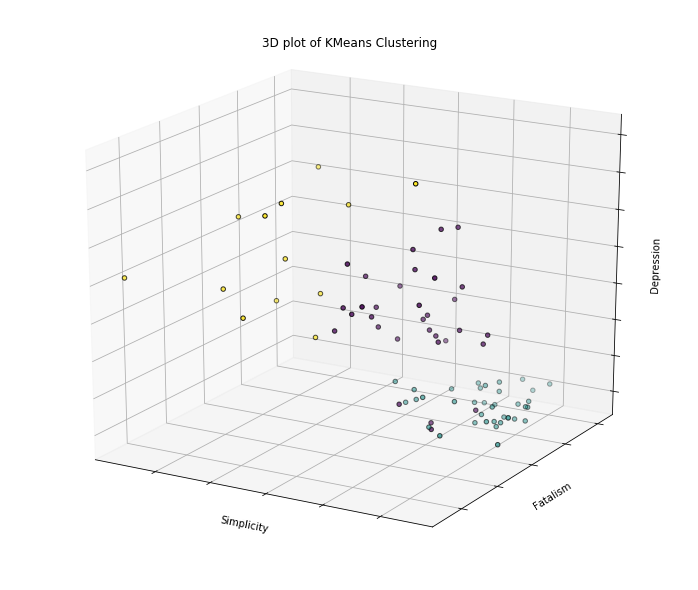

In [25]:
## Трехмерные графики кластеров
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=120)

kmeans.fit(mydata_z)
labels = kmeans.labels_

#3 столбца и столбец с надписью
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:,1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])


ax.set_xlabel('Simplicity')
ax.set_ylabel('Fatalism')
ax.set_zlabel('Depression')
ax.set_title('3D plot of KMeans Clustering')

In [26]:
# Давайте попробуем с K = 2
final_model=KMeans(2)
final_model.fit(mydata_z)
prediction=final_model.predict(mydata_z)

#Добавим предсказание
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["depression", "GROUP"]].head(10)

Groups Assigned : 



,depression,GROUP
0,0.59870,1
1,0.72787,1
2,0.53411,1
3,0.56641,1
4,0.50182,1
5,0.56641,1
6,0.46953,1
7,0.53411,1
8,0.46953,1
9,0.46953,1


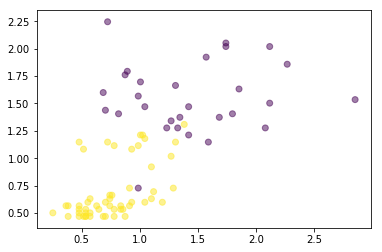

In [27]:
#plt.cla()

import matplotlib.cm as cm



colors = cm.rainbow(np.linspace(0, 1, 2))



plt.scatter(mydata["simplicity"],mydata["depression"], c = prediction, alpha=0.5)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e88346748>,
      dtype=object)

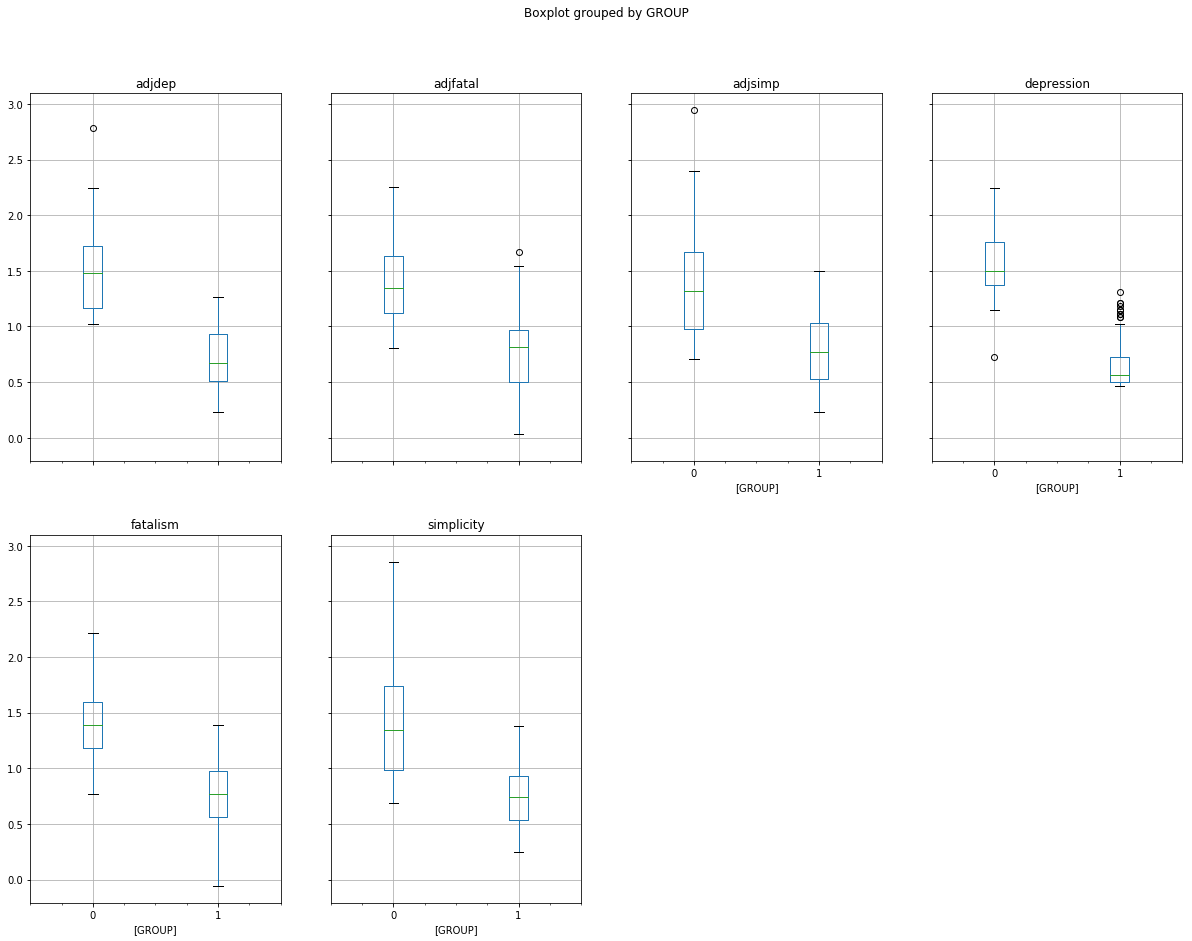

In [28]:
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

## Оценка силуэта

In [30]:
silhouette_avg = silhouette_score(mydata_z, final_model.labels_)
print("For n_clusters =", 2, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4194383356887897


## Кластеры № 2 дают четкое разделение высоких и низких значений

In [31]:
#Определить, существует ли связь между черно-белым мышлением (простотой) и депрессией.
mydata['simplicity'].corr(mydata['depression'])

0.6432667885861313

Приведенный выше коэффициент корреляции указывает на то, что взаимосвязь между черно-белым мышлением и депрессией можно
считать умеренной и положительной. Это означает, что мы можем видеть четкую взаимосвязь между черно-белым мышлением и 
Депрессией, хотя взаимосвязь не идеальна. Тот факт, что коэффициент корреляции положительный, указывает на то, что
более высокий уровень черно-белого мышления связан с более высоким уровнем депрессии